In [154]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical



In [155]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [156]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
koi_fpflag_nt,6991.0,0.157059,0.363882,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ss,6991.0,0.244743,0.429966,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_co,6991.0,0.202975,0.402243,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,6991.0,0.125018,0.330763,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,6991.0,56.191248,117.570962,2.598197e-01,2.620126,8.947426,34.282605,1.071233e+03
koi_period_err1,6991.0,0.001851,0.007185,1.100000e-08,0.000005,0.000033,0.000240,1.568000e-01
koi_period_err2,6991.0,-0.001851,0.007185,-1.568000e-01,-0.000240,-0.000033,-0.000005,-1.100000e-08
koi_time0bk,6991.0,164.488820,67.020475,1.205159e+02,132.683917,136.739230,169.937005,1.472522e+03
koi_time0bk_err1,6991.0,0.009340,0.021989,8.700000e-06,0.001145,0.003990,0.010000,5.690000e-01
koi_time0bk_err2,6991.0,-0.009340,0.021989,-5.690000e-01,-0.010000,-0.003990,-0.001145,-8.700000e-06


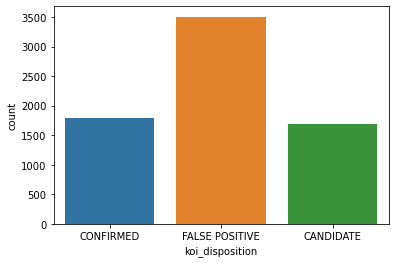

In [157]:
sns.countplot(x='koi_disposition', data=df)

In [158]:
X = df.drop('koi_disposition', axis=1).values
y = df['koi_disposition']

In [159]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [160]:
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [161]:
label_encoder.inverse_transform([0])

array(['CANDIDATE'], dtype=object)

In [162]:
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.1)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
print(X_train.shape, y_train.shape)

(6291, 40) (6291, 3)


## Build ANN model, multiclass categorical

In [165]:
model = Sequential()
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Early stop to avoid overfitting

In [166]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [167]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=600, callbacks=[early_stop], verbose=0)

Epoch 00161: early stopping


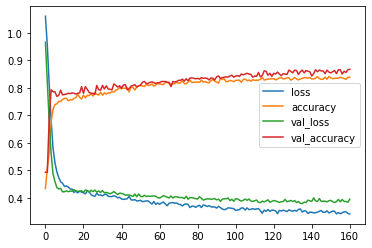

In [168]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [169]:
# predictions = model.predict(X_test)

In [170]:
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 500us/step - loss: 0.3947 - accuracy: 0.8671


[0.39468517899513245, 0.8671428561210632]

In [171]:
predictions = model.predict_classes(X_test)

In [172]:
#label_encoder.inverse_transform(predictions)

In [173]:
#np.argmax(y_test, axis=1)

In [174]:
confusion_matrix(np.argmax(y_test, axis=1), predictions )

array([[116,  43,   2],
       [ 38, 148,   8],
       [  2,   0, 343]], dtype=int64)

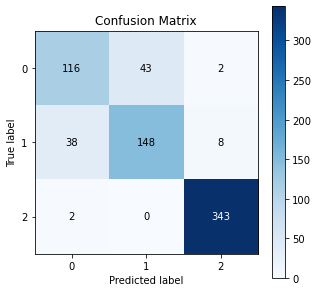

In [175]:
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), predictions, figsize=(5,5))

In [176]:

print(classification_report(np.argmax(y_test, axis=1), predictions))

precision    recall  f1-score   support

           0       0.74      0.72      0.73       161
           1       0.77      0.76      0.77       194
           2       0.97      0.99      0.98       345

    accuracy                           0.87       700
   macro avg       0.83      0.83      0.83       700
weighted avg       0.86      0.87      0.87       700



## Save model

In [177]:
model.save("models/ann.h5")